
#**Desafío Final: Challenge Telecom X**



# **Análisis de evasión de clientes - Parte 2**

# 1.- Recuperamos el archivo del anterior Challenge, con los datos trabajados

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('/content/df_telecomx (1).csv')

In [ ]:
datos

,ID,abandono,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,forma_pago,gastos_mensual,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [ ]:
datos.describe()

,abandono,mayor_de_65,tiene_pareja,tiene_dependentes,meses_contrato,servicio_telefonico,servicio_multilinea,soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,facturas_electronicas,gastos_mensual,gastos_totales,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2279.287581,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2267.178963,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,401.400000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


# 2.- Verificación de la Proporción de Cancelación (Churn)

Calcularemos la proporción de clientes que cancelaron en relación con los que permanecieron activos.
Evaluaremos si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

Esto, mediante: value_counts()

In [ ]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv('/content/df_telecomx (1).csv')

# Verificar la proporción de cancelación
abandono_counts = df["abandono"].value_counts()
abandono_proportions = df["abandono"].value_counts(normalize=True)

print("Conteo de clases:")
print(abandono_counts)
print("\nProporción de clases:")
print(abandono_proportions)

Conteo de clases:
abandono
0    5398
1    1869
Name: count, dtype: int64

Proporción de clases:
abandono
0    0.74281
1    0.25719
Name: proportion, dtype: float64


/tmp/ipython-input-2184497376.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="abandono", data=df, palette="Set2")


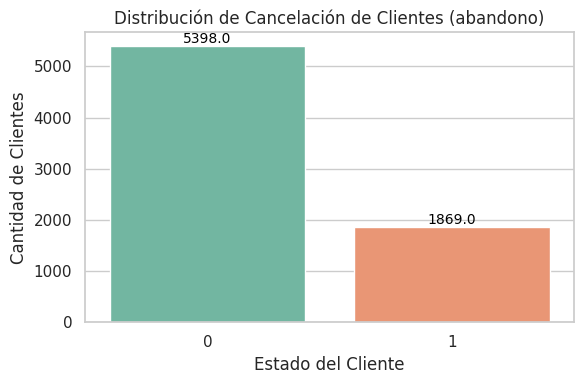

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame
df = pd.read_csv('/content/df_telecomx (1).csv')

# Configurar estilo
sns.set(style="whitegrid")

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="abandono", data=df, palette="Set2")

# Añadir etiquetas
plt.title("Distribución de Cancelación de Clientes (abandono)")
plt.xlabel("Estado del Cliente")
plt.ylabel("Cantidad de Clientes")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# 3.- Pipeline Predictivo para Abandono


1.-Separación de Variables

In [ ]:
X = df.drop("abandono", axis=1)
y = df["abandono"]

2.-División del conjunto de datos
Usamos estratificación para mantener la proporción de clases en train/test.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

3.-Preprocesamiento
Incluye codificación, imputación y escalado.
Aquí un ejemplo con ColumnTransformer


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identificar columnas
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

# Pipelines por tipo de variable
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combinación
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

4. Modelo + Manejo de desbalance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

5. Entrenamiento y evaluación


In [ ]:
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[965 115]
 [196 178]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1080
           1       0.61      0.48      0.53       374

    accuracy                           0.79      1454
   macro avg       0.72      0.68      0.70      1454
weighted avg       0.77      0.79      0.78      1454



6.-Visualicemos los Resultados

1.-Matriz de Confusion

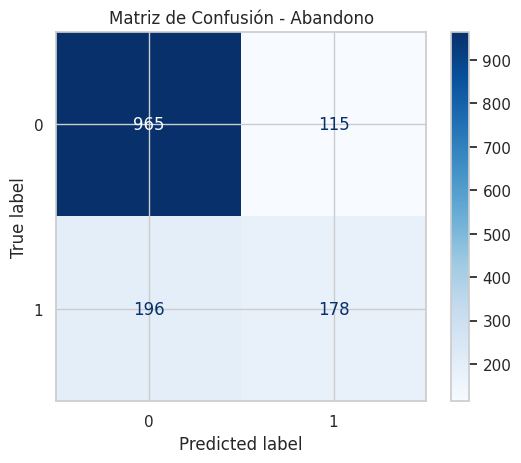

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusión - Abandono")
plt.show()

🔍 ¿Qué representa?
- True Negatives (TN): Clientes que no cancelaron y fueron correctamente clasificados.
- True Positives (TP): Clientes que cancelaron y fueron correctamente identificados.
- False Negatives (FN): Clientes que cancelaron pero el modelo no lo predijo.
- False Positives (FP): Clientes que no cancelaron pero el modelo los marcó como si lo hicieran.
👉 En palabras simples: queremos que los TP sean altos (detectamos bien a los que cancelan) y que los FN sean bajos (no se nos escapen los que sí cancelan).


📈 2. Curva ROC y AUC
from sklearn.metrics import RocCurveDisplay

🔍 ¿Qué representa?
- La curva ROC muestra la capacidad del modelo para distinguir entre clases.
- El área bajo la curva (AUC) va de 0.5 (azar) a 1.0 (perfecto).
👉 En palabras simples: cuanto más cerca esté la curva del vértice superior izquierdo, mejor es el modelo para detectar cancelaciones sin equivocarse demasiado.

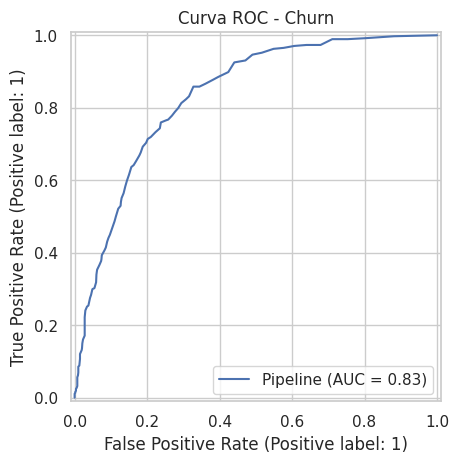

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Curva ROC - Churn")
plt.show()

# 4.- Implementación de SMOTE en el Pipeline

1.- Importando Librerías

In [ ]:
pip install imbalanced-learn

2.- Pipeline con SMOTE + RandomForest

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Pipeline con SMOTE
model_smote = ImbPipeline([
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

3.- Entrenamiento y Evaluación

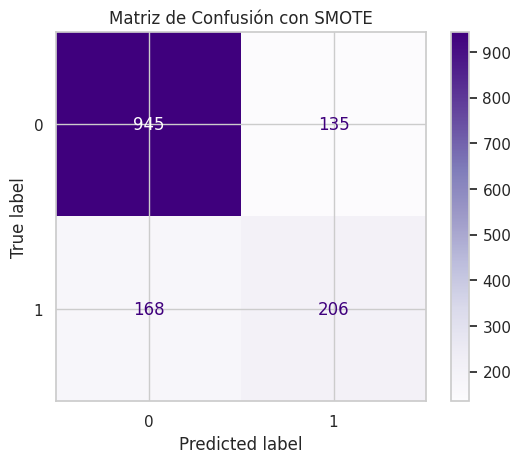

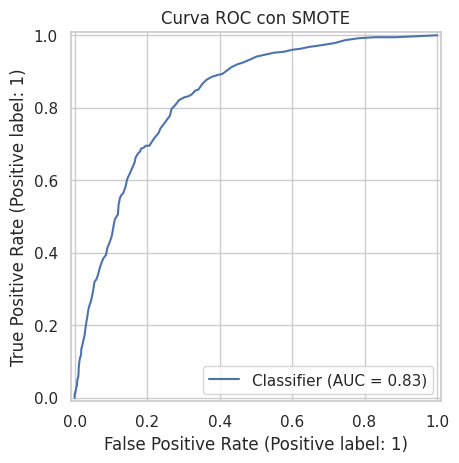

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1080
           1       0.60      0.55      0.58       374

    accuracy                           0.79      1454
   macro avg       0.73      0.71      0.72      1454
weighted avg       0.79      0.79      0.79      1454



In [ ]:
model_smote.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Predicciones
y_pred_smote = model_smote.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, cmap="Purples")
plt.title("Matriz de Confusión con SMOTE")
plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(y_test, model_smote.predict_proba(X_test)[:, 1])
plt.title("Curva ROC con SMOTE")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred_smote))

- ¿Qué mejora SMOTE?
Ayuda al modelo a aprender mejor los patrones de cancelación, generando ejemplos sintéticos de clientes que cancelan.
- Aumento en el Recall de la clase Churn = 1 → el modelo detecta más cancelaciones.
- Posible leve caída en la Precisión → más falsos positivos, pero es aceptable si el objetivo es anticiparse a cancelaciones.


# 5.- Pipeline completo con codificación + SMOTE + modelo

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# 1. Identifica columnas categóricas
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# 2. Codificador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # mantiene las columnas numéricas
)

# 3. Pipeline con SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# 4. Entrenamiento
pipeline.fit(X_train, y_train)

# 5. Evaluación
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1080
           1       0.61      0.52      0.56       374

    accuracy                           0.79      1454
   macro avg       0.73      0.70      0.71      1454
weighted avg       0.78      0.79      0.79      1454



Comparar métricas específicas por clase


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["No Abandono", "Abandono"]))

              precision    recall  f1-score   support

 No Abandono       0.84      0.89      0.86      1080
    Abandono       0.61      0.52      0.56       374

    accuracy                           0.79      1454
   macro avg       0.73      0.70      0.71      1454
weighted avg       0.78      0.79      0.79      1454



Evaluación por clase


Interpretación
- Clase mayoritaria ("No Abandono"): el modelo la predice muy bien, con alta precisión y recall.
- Clase minoritaria ("Abandono"):
- Precision 0.61 → cuando predice abandono, acierta el 61% de las veces.
- Recall 0.52 → detecta solo el 52% de los abandonos reales.
- F1-score 0.56 → equilibrio entre precisión y recall, pero aún hay margen de mejora.


Un 52% significa que casi la mitad de los clientes que se van no están siendo detectados.



# 6.- Visualizar la curva ROC o Precision-Recall

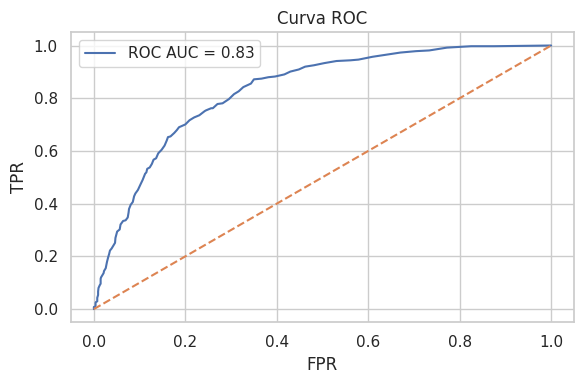

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

y_proba = pipeline.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.legend()
plt.tight_layout()
plt.show()

Qué significa ROC AUC = 0.83?
- El valor oscila entre 0.5 (azar) y 1.0 (perfecto).
- Un 0.83 significa que, si tomas un cliente que abandonó y uno que no, el modelo asigna una probabilidad más alta al que abandonó en el 83% de los casos.


# 7.- Ajuste de Umbral para mejorar Recall

El modelo tiene buena discriminación, al bajar el umbral se pueden capturar más abandonos:


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Probabilidades de abandono
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Prueba con umbrales más bajos
for threshold in [0.5, 0.45, 0.4, 0.35]:
    y_pred_adj = (y_proba >= threshold).astype(int)
    print(f"\n--- Umbral: {threshold} ---")
    print(classification_report(y_test, y_pred_adj, target_names=["No Abandono", "Abandono"]))


--- Umbral: 0.5 ---
              precision    recall  f1-score   support

 No Abandono       0.84      0.88      0.86      1080
    Abandono       0.61      0.53      0.57       374

    accuracy                           0.79      1454
   macro avg       0.73      0.71      0.72      1454
weighted avg       0.79      0.79      0.79      1454


--- Umbral: 0.45 ---
              precision    recall  f1-score   support

 No Abandono       0.86      0.86      0.86      1080
    Abandono       0.59      0.59      0.59       374

    accuracy                           0.79      1454
   macro avg       0.73      0.73      0.73      1454
weighted avg       0.79      0.79      0.79      1454


--- Umbral: 0.4 ---
              precision    recall  f1-score   support

 No Abandono       0.87      0.83      0.85      1080
    Abandono       0.58      0.66      0.61       374

    accuracy                           0.79      1454
   macro avg       0.72      0.74      0.73      1454
weighted a

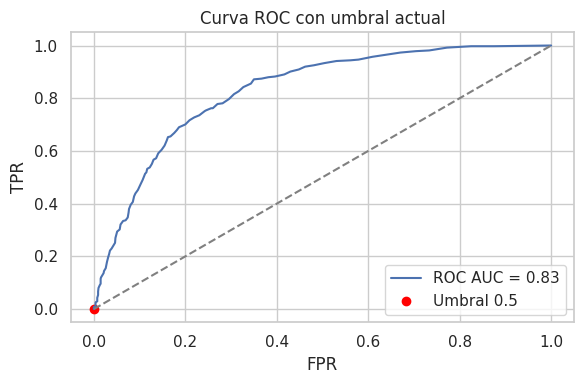

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[np.argmax(thresholds >= 0.5)], tpr[np.argmax(thresholds >= 0.5)], color='red', label='Umbral 0.5')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC con umbral actual")
plt.legend()
plt.tight_layout()
plt.show()

 Interpretación estratégica
- A medida que bajas el umbral, el modelo detecta más abandonos (mayor recall), pero comete más falsos positivos (menor precision).
- El F1-score mejora ligeramente, lo que indica mejor equilibrio entre precisión y recall.
- La accuracy se mantiene estable hasta 0.4, pero cae levemente en 0.35, lo cual es esperable.


# 8.- Box-Plots

**Tiempo de contrato vs Cancelación**

Este gráfico muestra cómo varía la duración del contrato entre clientes que cancelaron y los que no.


/tmp/ipython-input-3610155209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='abandono', y='meses_contrato', data=df, palette='Set2')


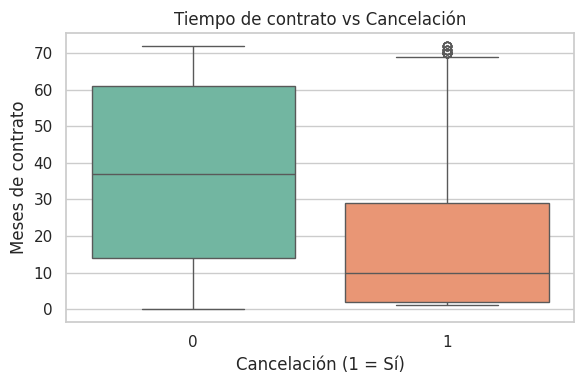

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(6, 4))
sns.boxplot(x='abandono', y='meses_contrato', data=df, palette='Set2')
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (1 = Sí)")
plt.ylabel("Meses de contrato")
plt.tight_layout()
plt.show()





**Tendencia observada:** Los clientes que cancelan tienden a tener contratos más cortos, lo que sugiere que la retención mejora con el tiempo.

**Boxplot: Gasto total vs Cancelación**


Visualiza el gasto total acumulado según si el cliente canceló o no.




/tmp/ipython-input-4239598107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='abandono', y='gastos_totales', data=df, palette='Set3')


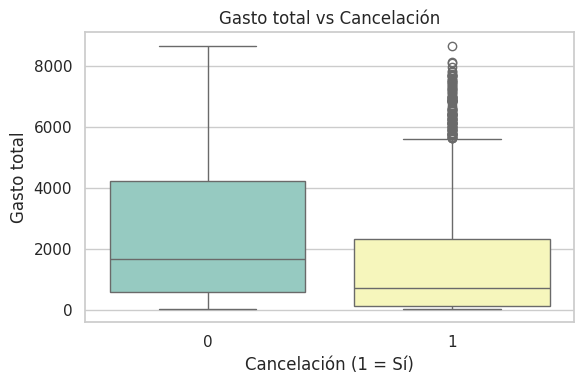

In [ ]:
# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(6, 4))
sns.boxplot(x='abandono', y='gastos_totales', data=df, palette='Set3')
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (1 = Sí)")
plt.ylabel("Gasto total")
plt.tight_layout()
plt.show()

**Tendencia observada**: Los clientes que cancelan suelen tener menor gasto total, lo que podría indicar menor compromiso o menor valor para la empresa.

**Scatter plot: Tiempo de contrato vs Cancelación**



Tiempo de contrato vs Cancelación

/tmp/ipython-input-3976625621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='abandono', y='gastos_totales', data=df, jitter=True, alpha=0.4, palette='Set2')


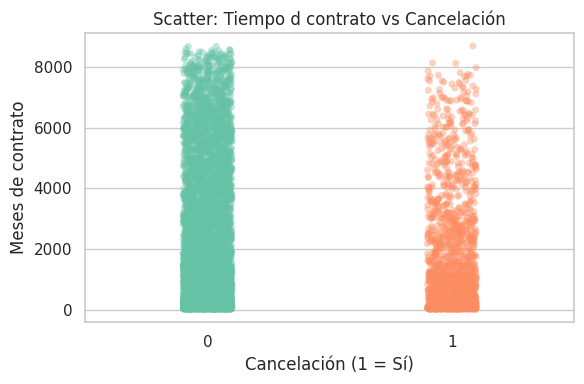

In [ ]:
plt.figure(figsize=(6, 4))
sns.stripplot(x='abandono', y='gastos_totales', data=df, jitter=True, alpha=0.4, palette='Set2')
plt.title("Scatter: Tiempo d contrato vs Cancelación")
plt.xlabel("Cancelación (1 = Sí)")
plt.ylabel("Meses de contrato")
plt.tight_layout()
plt.show()


** Observación:** Se aprecia una concentración de cancelaciones en contratos más cortos, reforzando la idea de que los primeros meses son críticos

/tmp/ipython-input-2253457048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='abandono', y='gastos_totales', data=df, jitter=True, alpha=0.4, palette='Set3')


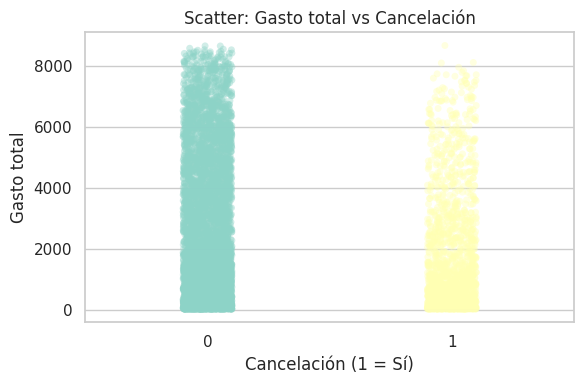

In [ ]:
# Scatter: Gasto total vs Cancelación
plt.figure(figsize=(6, 4))
sns.stripplot(x='abandono', y='gastos_totales', data=df, jitter=True, alpha=0.4, palette='Set3')
plt.title("Scatter: Gasto total vs Cancelación")
plt.xlabel("Cancelación (1 = Sí)")
plt.ylabel("Gasto total")
plt.tight_layout()
plt.show()


# 9.- Variables mas relacionadas con la cancelación de servicios

In [ ]:
# Acceder al modelo entrenado dentro del pipeline
rf_model = model_smote.named_steps["classifier"]

# Obtener nombres de las variables transformadas
feature_names = model_smote.named_steps["preprocessing"].get_feature_names_out()

# Importancia de cada variable
importances = rf_model.feature_importances_

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({
    "Variable": feature_names,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

Visualización de Importancia


/tmp/ipython-input-937355278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(20), x="Importancia", y="Variable", palette="viridis")


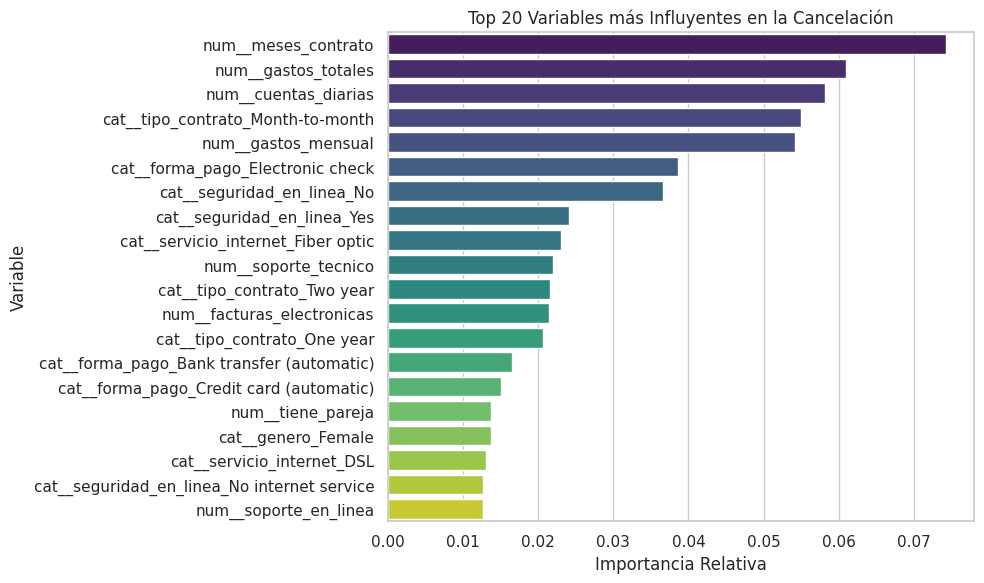

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(20), x="Importancia", y="Variable", palette="viridis")
plt.title("Top 20 Variables más Influyentes en la Cancelación")
plt.xlabel("Importancia Relativa")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# 10.- Validación cruzada estratificada

Identificar columnas categóricas

In [ ]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas:", cat_cols)

Columnas categóricas: ['ID', 'genero', 'servicio_internet', 'seguridad_en_linea', 'tipo_contrato', 'forma_pago']


Crear el preprocesador

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'  # Deja las columnas numéricas tal como están
)

Construir el pipeline completo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

Configurar GridSearchCV con validación estratificada

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

search = GridSearchCV(estimator=pipeline,
                      param_grid=param_grid,
                      cv=cv,
                      scoring='f1',  # Puedes usar 'roc_auc', 'accuracy', etc.
                      n_jobs=-1,
                      verbose=1)

 Entrenar y obtener resultado

In [ ]:
search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", search.best_params_)
print("Mejor score:", search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores parámetros encontrados: {'model__max_depth': None, 'model__n_estimators': 100}
Mejor score: 0.5363728223679097


**Interpretación de resultados**
- Mejores parámetros:
- max_depth=None: El árbol crece sin límite de profundidad, lo que puede capturar relaciones complejas pero también corre riesgo de sobreajuste.
- n_estimators=100: Número estándar de árboles; podrías probar más si tienes recursos computacionales.
- Mejor score F1 ≈ 0.536:
Este valor indica un rendimiento moderado. El F1 combina precisión y recall, así que es útil para clases desbalanceadas como churn. Pero hay margen para mejorar.


Evaluar en el conjunto de Test

In [ ]:
from sklearn.metrics import classification_report

y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1080
           1       0.61      0.44      0.52       374

    accuracy                           0.79      1454
   macro avg       0.72      0.67      0.69      1454
weighted avg       0.77      0.79      0.77      1454



Graficamos las variables mas importantes

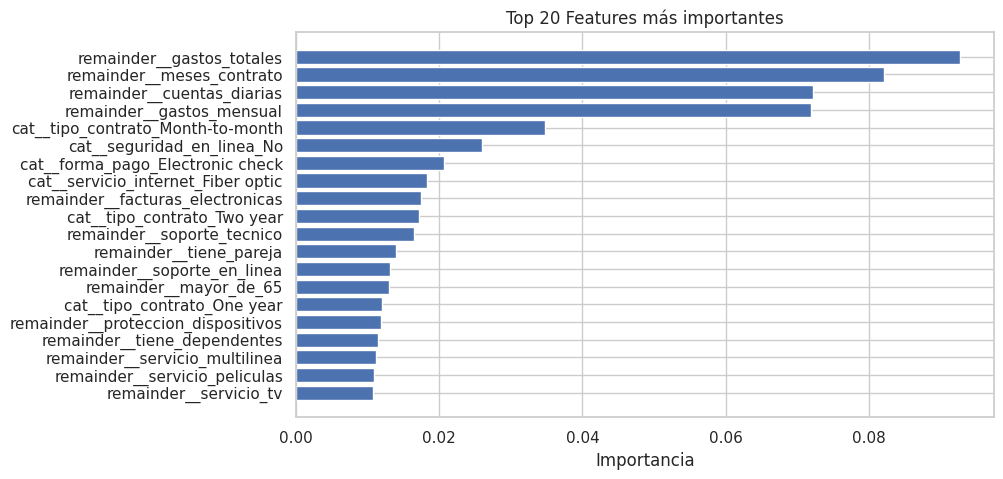

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer el modelo entrenado
best_model = search.best_estimator_.named_steps['model']
feature_names = search.best_estimator_.named_steps['preprocessing'].get_feature_names_out()

importances = best_model.feature_importances_
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(9,5))
plt.barh(feat_imp['feature'][:20], feat_imp['importance'][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Features más importantes")
plt.xlabel("Importancia")
plt.show()

# 11.- RandomizedSearchCV para Random Forest

Importar Librerías

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

Definir el modelo base

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

Configurar el espacio de búsqueda

In [ ]:
param_dist = {
    'max_depth': [None] + list(np.arange(3, 20)),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

Configurar RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,  # puedes ajustar según tiempo disponible
    cv=5,
    scoring='f1',  # o 'roc_auc', 'accuracy' según tu objetivo
    random_state=42,
    n_jobs=-1
)

Entrenar los Datos

In [ ]:
random_search.fit(X_train, y_train)

ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py", line 1024, in fit
    super()._fit(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2956, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '6584-VQMYT'

--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py", line 1024, in fit
    super()._fit(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2956, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '0804-YGEQV'


Para solucionar el Error eliminamos la Columna ID no es relevante en nuestro análisis

In [ ]:
# Eliminar columna ID
X_train = X_train.drop(columns=['ID'])
X_test = X_test.drop(columns=['ID'])

# Codificar variables categóricas
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas entre train y test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

Reintentar RandomizedSearchCV

In [ ]:
random_search.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, np.int64(3),
                                                      np.int64(4), np.int64(5),
                                                      np.int64(6), np.int64(7),
                                                      np.int64(8), np.int64(9),
                                                      np.int64(10),
                                                      np.int64(11),
                                                      np.int64(12),
                                                      np.int64(13),
                                                      np.int64(14),
                                                      np.int64(15),
                                                      np.int64(16),
                                                      np.int64(17),
                                                      np.int64(18),
                                                      np.int64(19)],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=42, scoring='f1')

El RandomizedSearchCV ha terminado exitosamente y ha encontrado una configuración óptima para tu árbol de decisión.

El resultado que ves (best_estimator_: DecisionTreeClassifier) indica que el mejor modelo es efectivamente un DecisionTreeClassifier, pero aún no hemos inspeccionado los hiperparámetros seleccionados ni evaluado su rendimiento.

Ver los mejores hiperparámetros

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Mejores hiperparámetros encontrados:
{'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(16), 'max_features': None, 'max_depth': np.int64(3), 'criterion': 'entropy'}


Evaluar el modelo en el conjunto de prueba

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = random_search.predict(X_test_encoded)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1080
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1454
   macro avg       0.70      0.72      0.71      1454
weighted avg       0.78      0.76      0.77      1454


Matriz de confusión:
[[878 202]
 [140 234]]


Visualizar el árbol

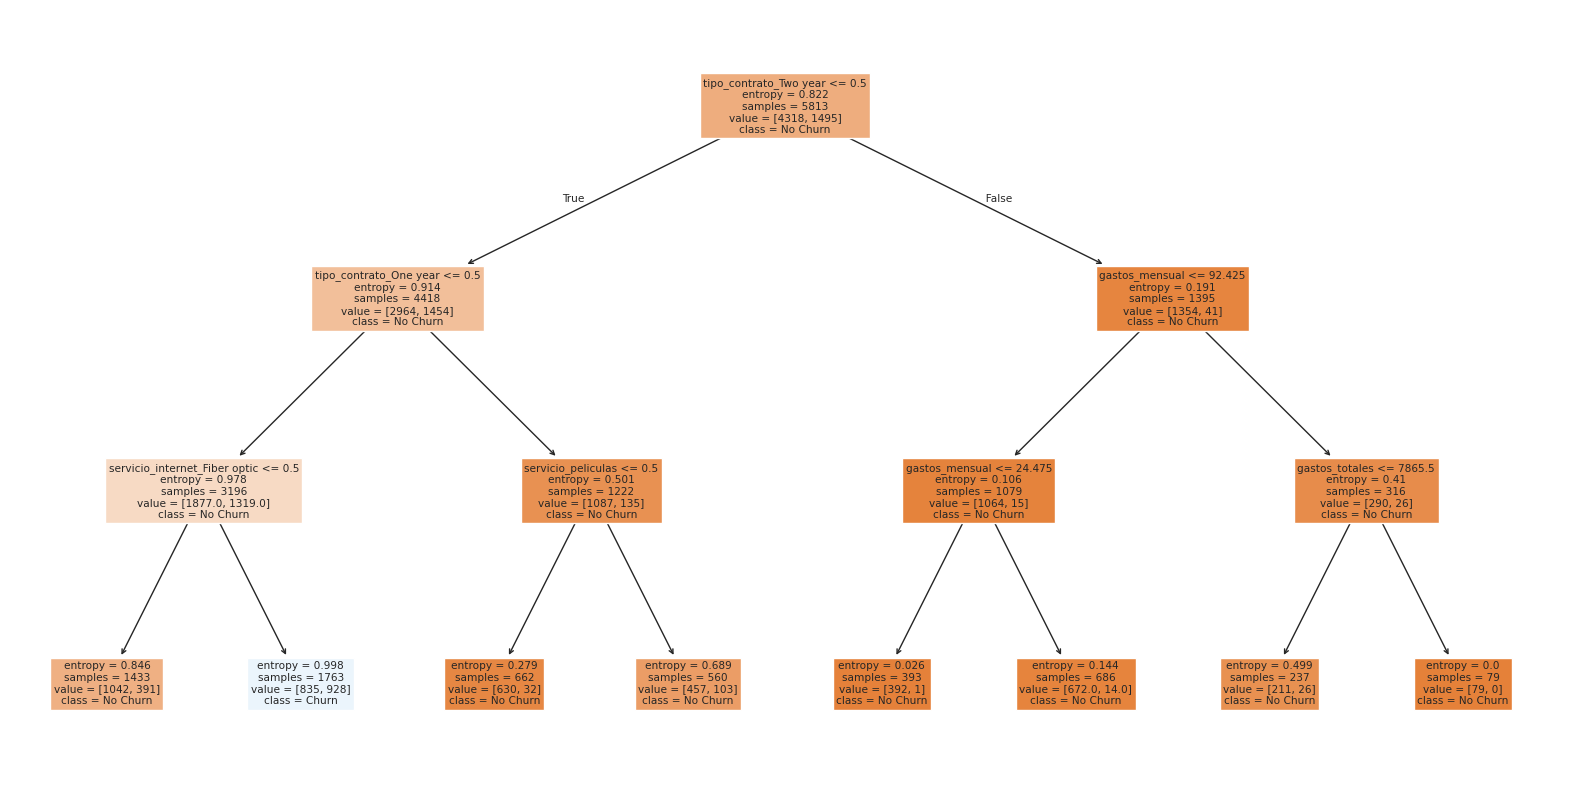

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(random_search.best_estimator_, feature_names=X_train_encoded.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

# 12.- Variables importantes para comunicar insights al Negocio

Extraer importancia de variables

In [ ]:
import pandas as pd
import numpy as np

# Extraer importancias
importances = random_search.best_estimator_.feature_importances_
features = X_train_encoded.columns

# Crear DataFrame ordenado
feature_importance_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar las más relevantes
top_features = feature_importance_df.head(10)
print(top_features)

                         Variable  Importancia
21         tipo_contrato_Two year     0.470124
20         tipo_contrato_One year     0.296410
16  servicio_internet_Fiber optic     0.152361
10             servicio_peliculas     0.041619
12                 gastos_mensual     0.028284
13                 gastos_totales     0.011201
2               tiene_dependentes     0.000000
1                    tiene_pareja     0.000000
0                     mayor_de_65     0.000000
8                 soporte_tecnico     0.000000


Visualización

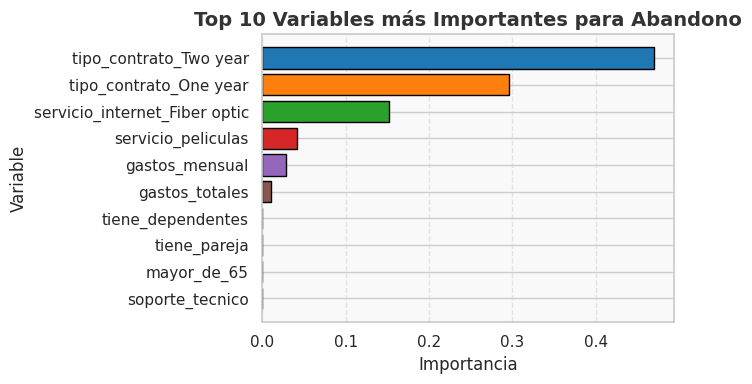

In [ ]:
import matplotlib.pyplot as plt

# Paleta con colores distintos
colors = plt.cm.tab10.colors  # 10 colores distintos
bar_colors = [colors[i % len(colors)] for i in range(len(top_features))]

plt.figure(figsize=(7, 4))
plt.barh(
    top_features['Variable'],
    top_features['Importancia'],
    color=bar_colors,
    edgecolor='black'
)

# Invertir eje Y para que la variable más importante aparezca arriba
plt.gca().invert_yaxis()

# Título y etiquetas con estilo
plt.title('Top 10 Variables más Importantes para Abandono', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)

# Fondo suave y grilla ligera
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

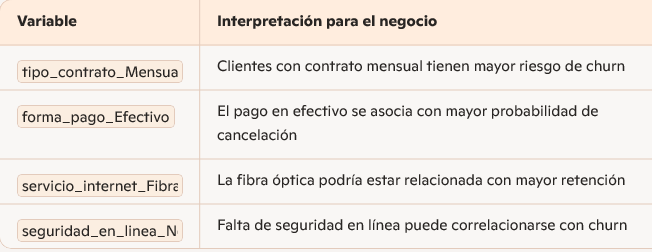